# Project 1 - Getting Started

### Notebook Setup

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
# Settings required in new code block due to an error in latest Jupyter version
sns.set()
matplotlib.rcParams["figure.dpi"] = 300
sns.set(font_scale=1.25, rc={"figure.figsize": (20, 10)})
sns.set_style("ticks")  # ticks
sns.set_palette("colorblind")

### Load data using Pandas

In [3]:
data_salaries = pd.read_csv("./data/Salaries.csv")
data_people = pd.read_csv("./data/People.csv")
data_teams = pd.read_csv("./data/Teams.csv")

### Join the three datasets

In [250]:
data = data_salaries.merge(data_teams, left_on=["yearID", "teamID", "lgID"], right_on=["yearID", "teamID", "lgID"])
data = data.merge(data_people, left_on=["playerID"], right_on=["playerID"])
data = data[["yearID", "teamID", "lgID", "playerID", "salary", "Rank", "nameFirst", "nameLast", "name", "attendance"]]
data = data[data["salary"] != 0]

### Combine player salaries on each team

In [251]:
team_salaries = {}
for index, row in data.iterrows():
    team_salaries[(row["yearID"], row["teamID"], row["lgID"])] = []
for index, row in data.iterrows():
    team_salaries[(row["yearID"], row["teamID"], row["lgID"])].append(row["salary"])

### Find the mean, min, max, and std for each team

In [252]:
data_analysis = pd.DataFrame(columns=["yearID", "teamID", "lgID", "mean", "min", "max", "std"])
for key in team_salaries:
    team_salaries[key] = np.array(sorted(team_salaries[key]))
    data_analysis = data_analysis.append({
        "yearID":key[0],
        "teamID":key[1],
        "lgID":key[2],
        "mean":team_salaries[key].mean(),
        "min":team_salaries[key].min(),
        "max":team_salaries[key].max(),
        "std":team_salaries[key].std(),
        "top_difference":team_salaries[key][-1] - team_salaries[key][-2]
        }, ignore_index=True)

In [253]:
largest_variance = data_analysis.iloc[data_analysis["top_difference"].idxmax()]
smallest_variance = data_analysis.iloc[data_analysis["std"].idxmin()]

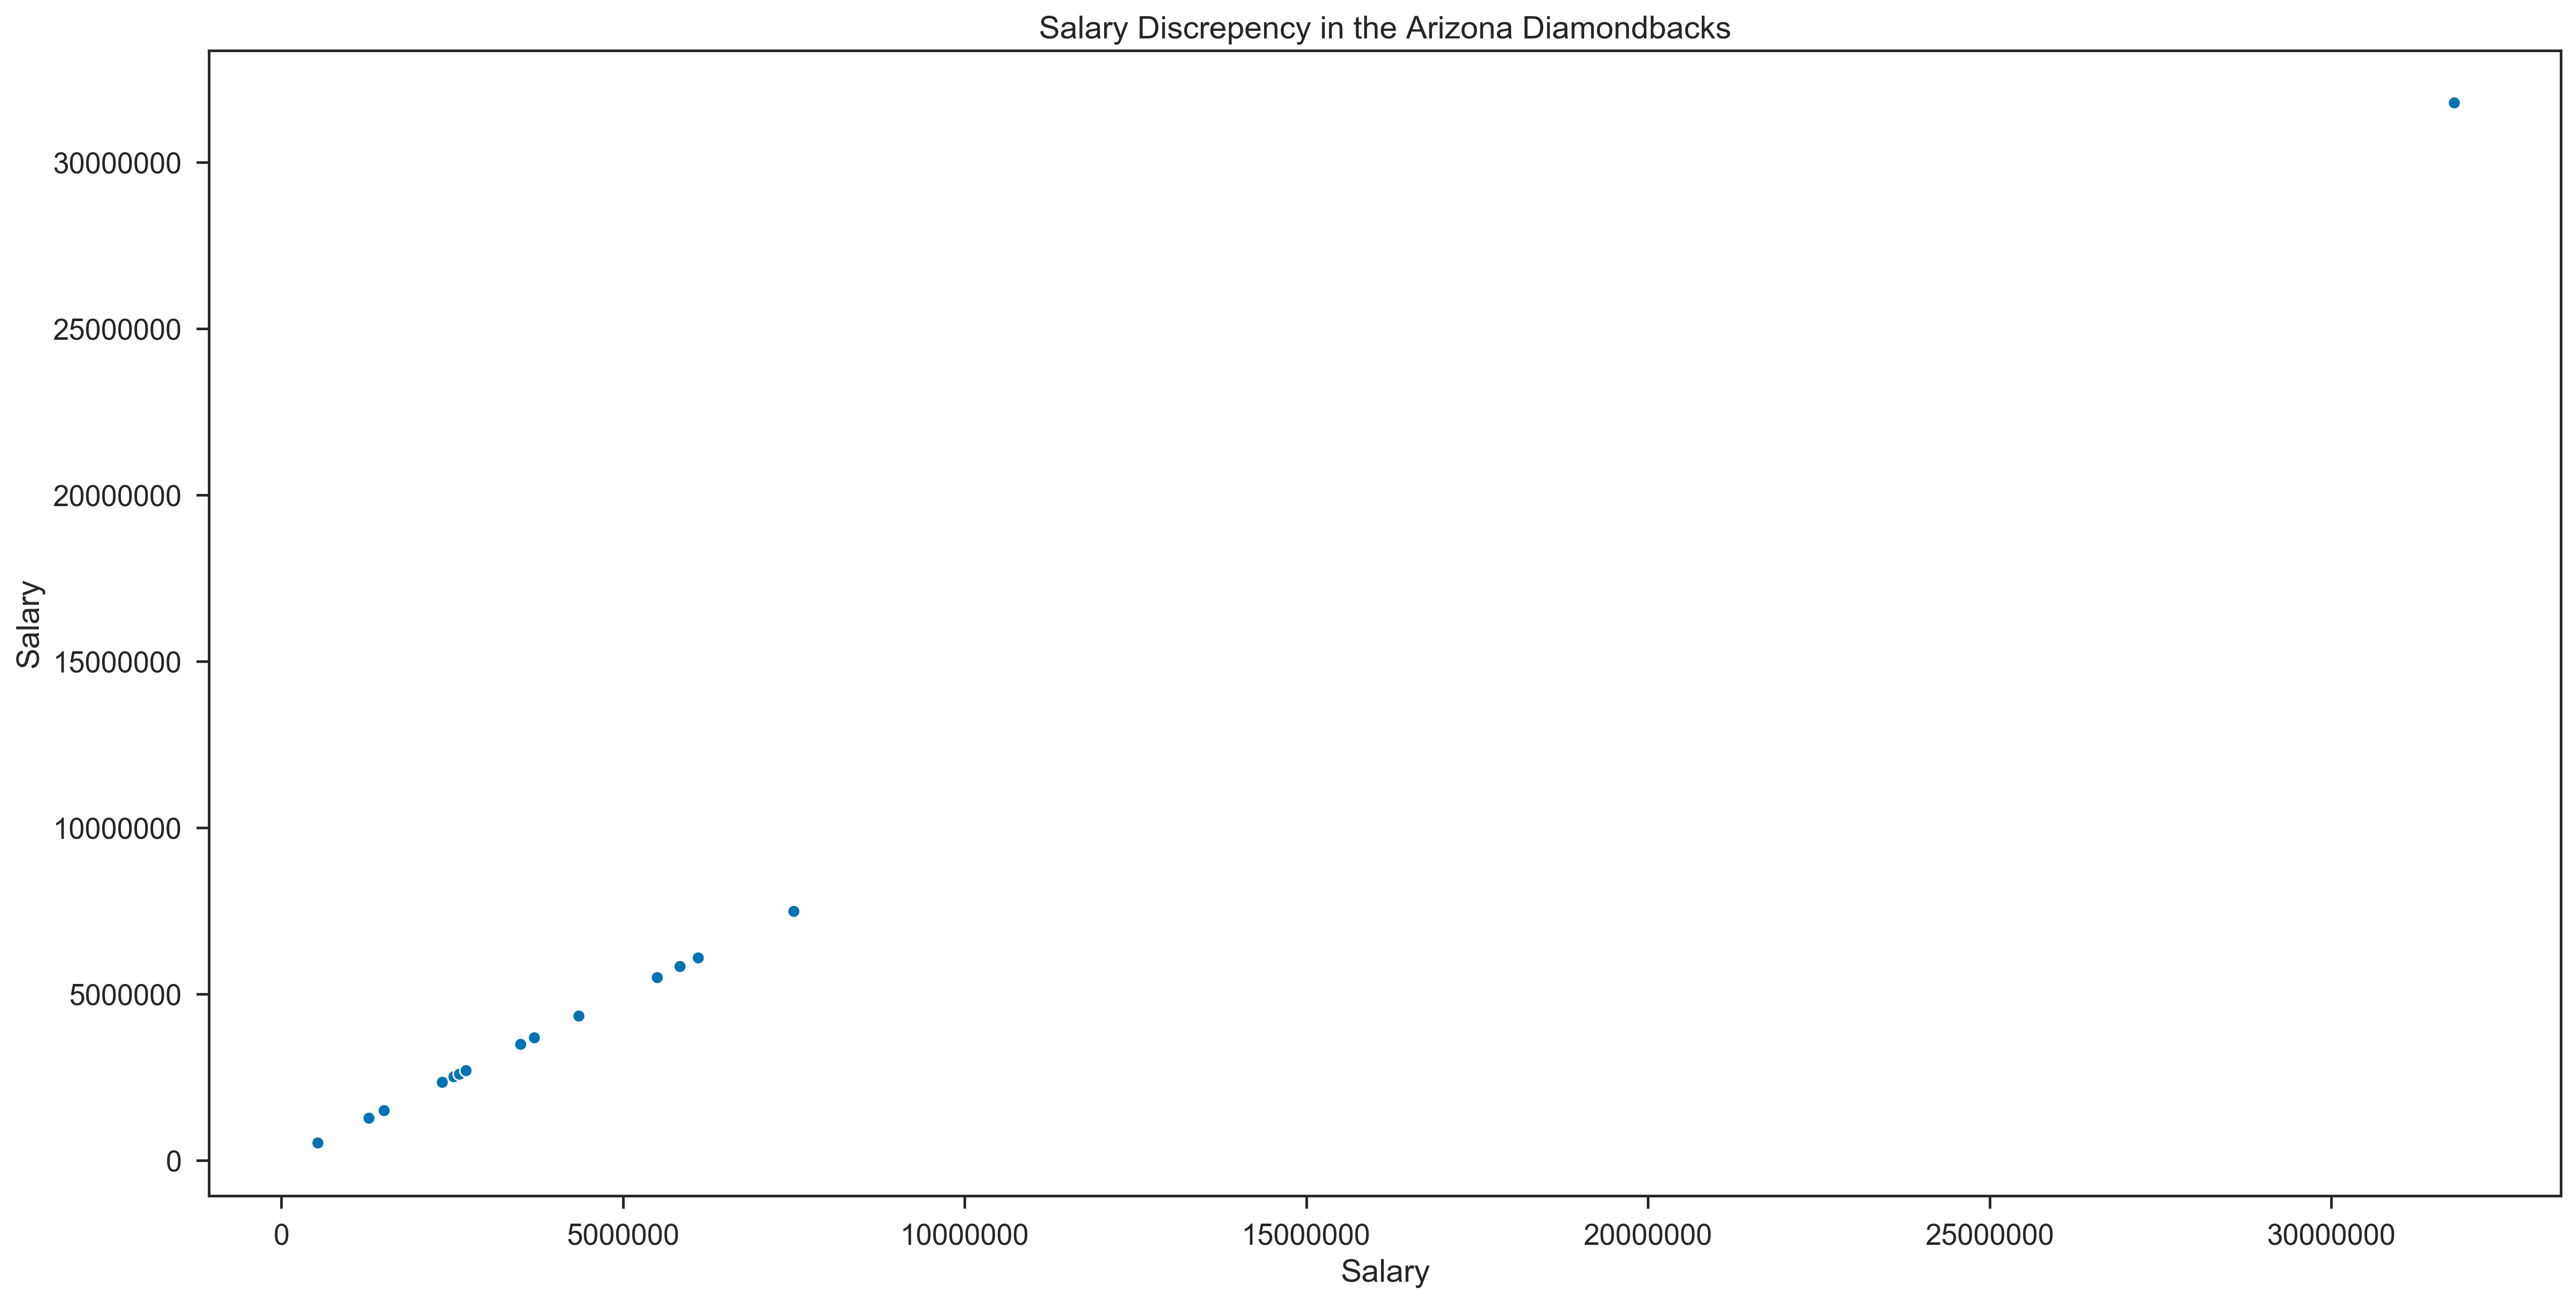

In [261]:
yearID = largest_variance["yearID"]
teamID = largest_variance["teamID"]
lgID = largest_variance["lgID"]
team_name = data[(data["yearID"] == yearID) & (data["teamID"] == teamID) & (data["lgID"] == lgID)]["name"].iloc[0]

sns.scatterplot(team_salaries[(yearID, teamID, lgID)],team_salaries[(yearID, teamID, lgID)])

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.ylabel("Salary")
plt.xlabel("Salary")
plt.title(f"Salary Discrepency in the {team_name}")

plt.show()